In [1]:
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.dictionary import *
from csc.workbench import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


In [2]:
batchSize = 200
path_to_mmpdf_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mmpdf-{batchSize}.json'
path_to_mp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mp-{batchSize}.json'

pomme = True

if pomme :
    input_signals_db = f'/home/gomes/synthetic-data/csc-signals-{batchSize}.json'
    input_mmpdf_db = f'/home/gomes/synthetic-data/csc-mmpdf-{batchSize}.json'
    input_mp_db = f'/home/gomes/synthetic-data/csc-mp-{batchSize}.json' 
    
else:
    input_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-signals-{batchSize}.json'
    input_mmpdf_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mmpdf-{batchSize}.json'
    input_mp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mp-{batchSize}.json'


In [3]:
workbench = CSCWorkbench(input_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

In [4]:
with open(input_signals_db, 'r') as f:
            output_data = json.load(f)
            signals_results = output_data['signals']

id0 = next(x['id'] for x in signals_results if x['sparsity'] == 5 and x['snr'] == 10)
signal_dict = next(x for x in signals_results if x['id'] == id0)


In [5]:
CONNECTIONS = 3
DISSIMILARITY = 0.8 ## << DISSIMILARITY >>
BRANCHES = 10
MAX_SPARSITY = 10

In [6]:
pos_err_threshold = 10
correlation_threshold = 0.9

list_idx = [id0 + i for i in range(10)]
signal_dicts = [next(x for x in signals_results if x['id'] == id) for id in list_idx]

for signal_dict in signal_dicts : 
    true_atoms = signal_dict['atoms']
    true_sparsity = len(true_atoms)
    
    mmp_sparVar_results = dictionary.mmpdfSparVarFromDict(
        signal_dict=signal_dict, 
        connections_level=CONNECTIONS,
        dissimilarity=DISSIMILARITY,
        nb_branches=BRANCHES,
        max_sparsity=MAX_SPARSITY,
        verbose=False
    )

    mmp_results = mmp_sparVar_results['results']
    mmp_dict_approx = mmp_results[true_sparsity - 1]
    approx_atoms = mmp_dict_approx['atoms']
    approx_path = mmp_dict_approx['path']

    print(f'\nID n°{signal_dict["id"]} ==> {approx_path} : TP = {tp}/{true_sparsity}')
    tp = workbench.computeTruePositives(true_atoms, approx_atoms, pos_err_threshold, correlation_threshold, verbose=True)

    REAL x=99 b=0.010, y=0.024, sigma=5.593e-05   |  APPROX x=101 b=0.015, y=0.022, sigma=3.882e-05  ==> True  |  0.9758314482019257
    REAL x=76 b=0.045, y=0.014, sigma=2.069e-05   |  APPROX x=44 b=0.010, y=0.016, sigma=2.476e-05  ==> False  |  0.521967917022907
    REAL x=135 b=0.005, y=0.010, sigma=1.352e-05   |  APPROX x=135 b=0.005, y=0.010, sigma=1.352e-05  ==> True  |  0.9999817809935785
    REAL x=15 b=0.045, y=0.016, sigma=2.514e-05   |  APPROX x=28 b=0.055, y=0.016, sigma=2.533e-05  ==> False  |  0.4105800037853096
    REAL x=98 b=0.025, y=0.022, sigma=3.699e-05   |  APPROX x=117 b=0.005, y=0.010, sigma=1.352e-05  ==> False  |  0.18969152206741796

ID n°3400 ==> 1-3-1-1-1 : TP = 2/5
    TRUE x=99 : {'x': 99, 'b': 0.01, 'y': 0.024, 's': 5.593441125723278e-05}  ||  APPROX x=101 : {'x': 101, 'b': 0.015, 'y': 0.022, 's': 3.88219621602011e-05}
    TRUE x=76 : {'x': 76, 'b': 0.045, 'y': 0.014, 's': 2.0690700982160427e-05}  ||  APPROX x=44 : {'x': 44, 'b': 0.01, 'y': 0.016, 's': 2.

In [7]:
DISSIMILARITY = 0.95 ## << DISSIMILARITY >>

In [8]:
pos_err_threshold = 10
correlation_threshold = 0.9

list_idx = [id0 + i for i in range(10)]
signal_dicts = [next(x for x in signals_results if x['id'] == id) for id in list_idx]

for signal_dict in signal_dicts : 
    true_atoms = signal_dict['atoms']
    true_sparsity = len(true_atoms)
    
    mmp_sparVar_results = dictionary.mmpdfSparVarFromDict(
        signal_dict=signal_dict, 
        connections_level=CONNECTIONS,
        dissimilarity=DISSIMILARITY,
        nb_branches=BRANCHES,
        max_sparsity=MAX_SPARSITY,
        verbose=False
    )

    mmp_results = mmp_sparVar_results['results']
    mmp_dict_approx = mmp_results[true_sparsity - 1]
    approx_atoms = mmp_dict_approx['atoms']
    approx_path = mmp_dict_approx['path']

    tp = workbench.computeTruePositives(true_atoms, approx_atoms, pos_err_threshold, correlation_threshold, verbose=True)
    
    print(f'\nID n°{signal_dict["id"]} ==> {approx_path} : TP = {tp}/{true_sparsity}')
    for true_atom, approx_atom in zip(true_atoms, approx_atoms):
        print(f'    TRUE x={true_atom["x"]} : {str(true_atom)}  ||  APPROX x={approx_atom["x"]} : {str(approx_atom)}')
    

KeyboardInterrupt: 

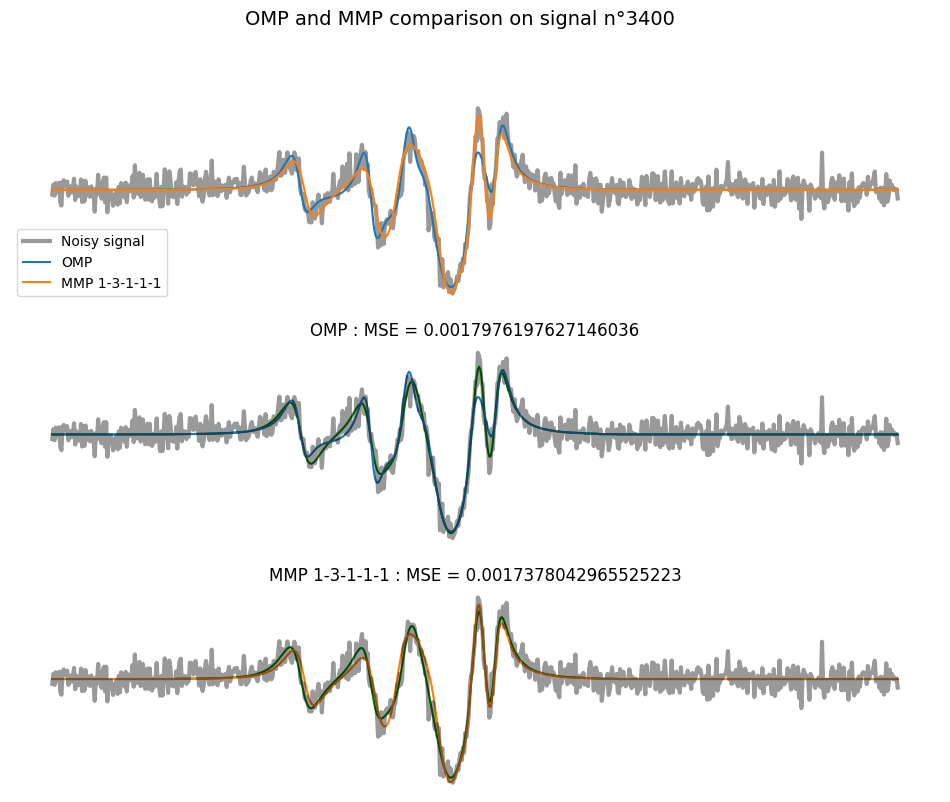

In [ ]:
workbench.plotMMPComparison(path_to_mmpdf_db, id0)